In [17]:
!pip install xgboost


In [18]:
# Importing the Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from termcolor import colored as cl 
import itertools 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

In [19]:
# Model training

In [20]:
import pandas as pd
Credit_Card = pd.read_csv("credit_card_detection.csv")
Credit_Card.drop('Time', axis = 1, inplace = True)
Credit_Card.shape

(186948, 30)

In [21]:
print(Credit_Card.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [22]:
# Checking the distribution of the transactions
Transaction_total = len(Credit_Card)
normal = len(Credit_Card[Credit_Card.Class == 0])
fraudulent = len(Credit_Card[Credit_Card.Class == 1])
Percentage_fraud = round(fraudulent/normal*100,2)
print('Total number of transactions are {}'. format(Transaction_total))
print('Total number of normal transactions are {}'. format(normal))
print('Total number of fraudulent transactions are {}'. format(fraudulent))
print('Percentage of fraud transactions are {}'. format(Percentage_fraud))

Total number of transactions are 186948
Total number of normal transactions are 186579
Total number of fraudulent transactions are 368
Percentage of fraud transactions are 0.2


In [23]:
# Statistical analysis for the amount of the fraud and the non fraud transaction amount

nonfraud_cases = Credit_Card[Credit_Card.Class == 0]
fraud_cases = Credit_Card[Credit_Card.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    186579.000000
mean         88.808092
std         247.429026
min           0.000000
25%           5.950000
50%          22.710000
75%          78.650000
max       19656.530000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     368.000000
mean      115.659891
std       248.444604
min         0.000000
25%         1.000000
50%        11.395000
75%       104.007500
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [24]:
# Normalize the Amount column using the ‘StandardScaler’ method
SC = StandardScaler()
amount = Credit_Card['Amount'].values

Credit_Card['Amount'] = SC.fit_transform(amount.reshape(-1, 1))

print(cl(Credit_Card['Amount'].head(10), attrs = ['bold']))

0    0.245558
1   -0.348260
2    1.171224
3    0.139994
4   -0.076267
5   -0.344300
6   -0.338965
7   -0.194239
8    0.017536
9   -0.344259
Name: Amount, dtype: float64


In [25]:
Credit_Card.fillna(0,inplace=True)

In [26]:
# defining the independent (X) and the dependent variables (Y)

X = Credit_Card.drop('Class', axis = 1).values
y = Credit_Card['Class'].values

# split the data into a training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])


X_train samples :  [[ 1.26575539e+00  3.72771841e-01  1.43954734e-01  1.10058625e+00
  -7.03367890e-02 -7.52965162e-01  2.44765609e-01 -1.25512556e-01
   2.25400870e-02  6.98712050e-02 -9.12209900e-01 -5.13630157e-01
  -1.13959009e+00  6.86166722e-01  1.04332283e+00  3.75153008e-01
  -5.37835224e-01 -3.85517461e-01  3.73409180e-02 -2.06071027e-01
  -5.16759190e-01 -1.60836274e+00  1.80240360e-01 -2.35787501e-01
   2.71640471e-01 -8.03533468e-01  1.45562300e-03  2.19642110e-02
  -3.34963790e-01]]
X_test samples :  [[-1.39748434 -0.30851785  2.93839036  0.52707395  0.70103037  1.34884403
  -0.95059615  0.68397082  1.94526633 -1.23490137  0.49875751 -1.83359725
   1.61158252  0.61855668 -2.13796013  0.43210787 -0.08166023  1.44341509
  -0.2414539   0.14598981  0.11843955  0.54895685 -0.31428692  0.07844185
   0.66486005 -0.45513441  0.07498863  0.08468707 -0.23808891]]
y_train samples :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test samples :  [0. 0. 0. 0. 0. 0. 0. 

In [27]:
# Building six different types of classification models
# Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machine (SVM), Random Forest, and XGBoost
# MODELING

# 1. K-Nearest Neighbors

N = 5

KNN = KNeighborsClassifier(n_neighbors = N)
KNN.fit(X_train, y_train)
KNN_FitPred = KNN.predict(X_test)

# 2. SVM 

SVM = SVC()
SVM.fit(X_train, y_train)
SVM_FitPred = SVM.predict(X_test)

# 3. XGBoost

XGB = XGBClassifier(max_depth = 4)
XGB.fit(X_train, y_train)
XGB_FitPred = XGB.predict(X_test)

# 4. Random Forest Tree

RandomForest = RandomForestClassifier(max_depth = 4)
RandomForest.fit(X_train, y_train)
RandomForest_FitPred = RandomForest.predict(X_test)

# 5. Logistic Regression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
LogisticRegression_FitPred = LogisticRegression.predict(X_test)

# 6. Decision Tree

Desctree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
Desctree.fit(X_train, y_train)
tree_FitPred = Desctree.predict(X_test)

C:\Users\olatu\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
# Finding the best model
# Checking the accuracy score of the six different classification models

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, KNN_FitPred)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, LogisticRegression_FitPred)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, SVM_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, RandomForest_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, XGB_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.999277881786574
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995453329767318
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9989569403583846
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993313720246055
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9993313720246055
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9995453329767318
------------------------------------------------------------------------


In [29]:
# F1 score
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, KNN_FitPred)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, LogisticRegression_FitPred)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, SVM_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, RandomForest_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, XGB_FitPred)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.7768595041322314
------------------------------------------------------------------------
F1 score of the KNN model is 0.859504132231405
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.6666666666666666
------------------------------------------------------------------------
F1 score of the SVM model is 0.782608695652174
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7863247863247864
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8617886178861789
------------------------------------------------------------------------


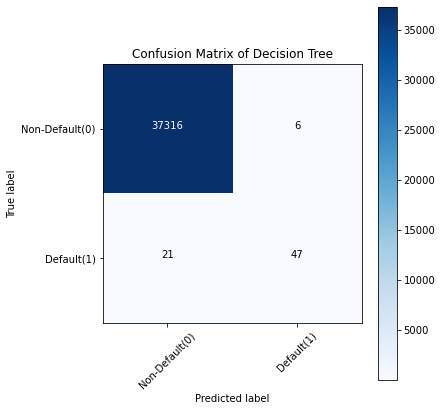

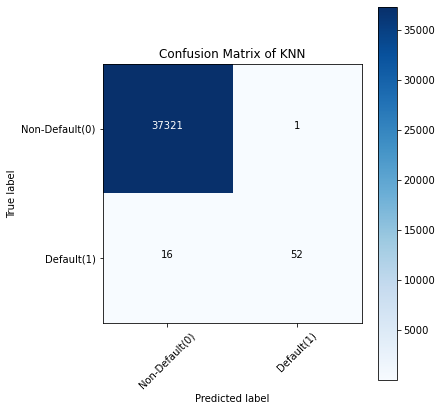

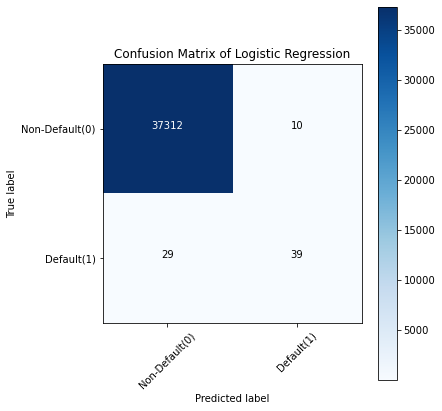

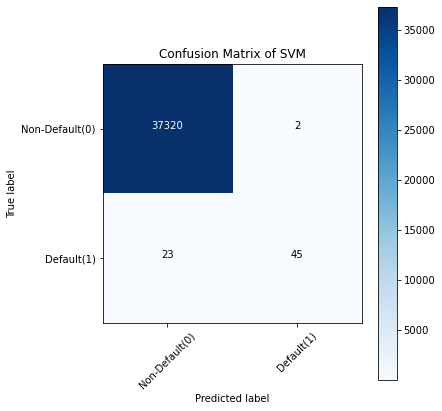

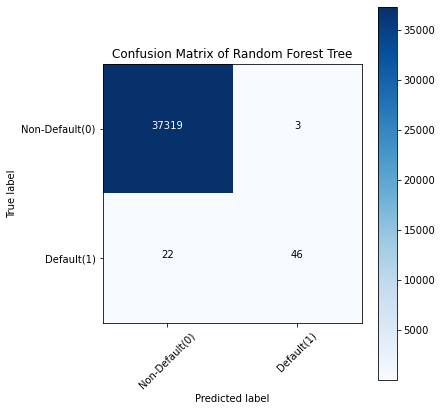

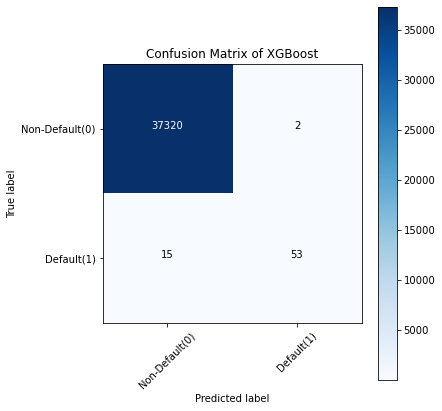

In [30]:
# Confusion Matrix


# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_FitPred, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, KNN_FitPred, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, LogisticRegression_FitPred, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, SVM_FitPred, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, RandomForest_FitPred, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, XGB_FitPred, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

#  K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

#  Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

#  Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

#  XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()